In [282]:
d = 1.8
c = 0.05
k = 1
b = 0

pricefactor = 0.45

qCournot = (d*(1+2*c))/(4*(c**2)+8*c+3)
qComp = d / (2 * (1+c))
qLeader = d * (1+2*c) / (2 * (1 + 4*c + c**2))
qFollower = (d - qLeader) / (2 * (1+c))
qCartel = d / (4 + 2*c)

qfolltest = (d * (1+6*c+2*(c**2)))/(4*(1+c)*(1+4*c+c**2))
print(qfolltest)
print("Cournot | Comp. | Follower | Leader | Bowley | Cartel")
print("Quantities:")
print (" %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f" % (qCournot, qComp, qFollower, qLeader, qLeader, qCartel))
#print(qCournot, qComp, qFollower, qLeader, qLeader, qCartel)

def profit(qSelf, qOther):
    return k * ( (d - qSelf - qOther)*qSelf - c * qSelf**2) + b

print("Profits:")
print (" %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f" % (profit(qCournot, qCournot), profit(qComp, qComp),  profit(qFollower, qLeader), profit(qLeader, qFollower), profit(qLeader, qLeader), profit(qCartel, qCartel)))
#print(profit(qCournot, qCournot), profit(qComp, qComp), profit(qFollower, qLeader), profit(qLeader, qFollower), profit(qLeader, qLeader), profit(qCartel, qCartel))


0.4651024651024651
Cournot | Comp. | Follower | Leader | Bowley | Cartel
Quantities:
 0.581  |  0.857  |  0.465  |  0.823  |  0.823  |  0.439
Profits:
 0.354  |  0.037  |  0.227  |  0.387  |  0.092  |  0.395


In [283]:
profit(qCournot, qLeader)

0.2131186978221316

In [284]:
def price(q1, q2):
    return d - q1 - q2


print("Prices:")
print(price(qCournot, qCournot), price(qComp, qComp), price(qFollower, qLeader), price(qLeader, qFollower), price(qLeader, qLeader), price(qCartel, qCartel))

Prices:
0.6387096774193547 0.08571428571428585 0.5116127116127115 0.5116127116127116 0.15343035343035316 0.9219512195121949


In [285]:
import numpy as np

values = {}
valDat = np.zeros((100, 100))
for i in range(1, 1000):
    incr = i # 1000-i
    for j in range(1, 1000):
        values[(incr, j)] = profit(incr/1000, j/1000)
        if incr %10 == 0 & j%10== 0:
            valDat[(int)(incr/10), (int)(j/10)] = profit(incr/1000, j/1000)

maxelem = max(values, key = lambda k: values[k])
minelem = min(values, key = lambda k: values[k])

print ("Max Profit : ", [x/1000 for x in maxelem], values[maxelem])
print ("Min Profit: ", [x/1000 for x in minelem], values[minelem])

Max Profit :  [0.857, 0.001] 0.7705715500000001
Min Profit:  [0.999, 0.999] -0.24770204999999995


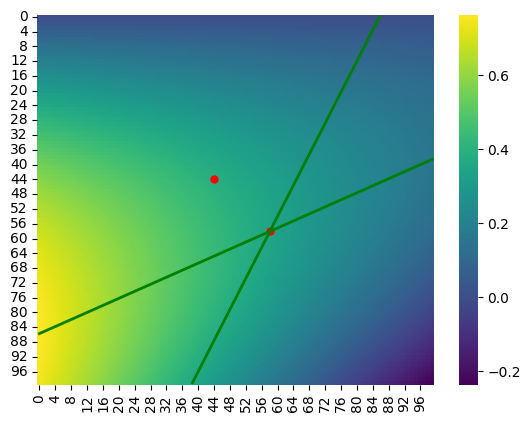

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(valDat, cmap='viridis', annot=False, fmt=".2f", cbar=True)
cour_i, cour_j = qCournot, qCournot
car_i, car_j = qCartel, qCartel  

xaxis = []
reacVal = []
for i in range(0, 100):
    xaxis.append(i+0.5)
    reacVal.append(((d - (i/100)) / (2 * (1+c)))*100 + 0.5)

plt.plot(reacVal, xaxis, color='green', linestyle='-', linewidth=2) 
plt.plot(xaxis, reacVal, color='green', linestyle='-', linewidth=2) # Adjust coordinates for the center of the cell

plt.scatter(cour_i*100 + 0.5, cour_j*100 + 0.5, color='red', marker='.', s=100)
plt.scatter(car_i*100 + 0.5, car_j*100 + 0.5, color='red', marker='.', s=100)   
plt.show()


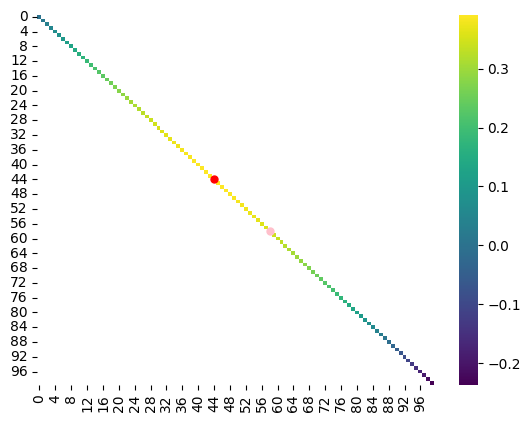

In [287]:
testValDat = valDat
for i in range(0, 100):
    for j in range(0, 100):
        if testValDat[i, j] != testValDat[j, i]:
            testValDat[i, j] = testValDat[j, i] = None

sns.heatmap(testValDat, cmap='viridis', annot=False, fmt=".2f", cbar=True)
plt.scatter(cour_i*100 + 0.5, cour_j*100 + 0.5, color='pink', marker='.', s=100)
plt.scatter(car_i*100 + 0.5, car_j*100 + 0.5, color='red', marker='.', s=100)  
plt.show()

In [288]:
prices = {}
for i in range(1, 1000):
    for j in range(1, 1000):
        prices[(i, j)] = price(i/1000, j/1000)

maxpelem = max(prices, key = lambda k: prices[k])
minpelem = min(prices, key = lambda k: prices[k])

print ("Max Price: ", [x/1000 for x in maxpelem], "Raw: ", prices[maxpelem], "Discounted: ", prices[maxpelem] * pricefactor)
print ("Min Price: ", [x/1000 for x in minpelem], "Raw: ", prices[minpelem], "Discounted: ", prices[minpelem] * pricefactor)

Max Price:  [0.001, 0.001] Raw:  1.7980000000000003 Discounted:  0.8091000000000002
Min Price:  [0.999, 0.999] Raw:  -0.19799999999999995 Discounted:  -0.08909999999999998


0.44897959183673475
[0, 0, 0.44897959183673475, 0.44897959183673475, 0.8562173168587164, 0.8562173168587164, 1.225593938193847, 1.225593938193847, 1.560629422398047, 1.560629422398047, 1.8645164829007228, 1.8645164829007228, 2.1401510048986148, 2.1401510048986148, 2.3901596416313966, 2.3901596416313966, 2.61692484501714, 2.61692484501714, 2.8226075691765438, 2.8226075691765438, 3.009167863198679, 3.009167863198679, 3.178383549386557, 3.178383549386557, 3.331867164976469, 3.331867164976469, 3.4710813287768425, 3.4710813287768425, 3.5973526791626687, 3.5973526791626687, 3.711884516247318, 3.711884516247318, 3.8157682687050505, 3.8157682687050505, 3.9099938945170525, 3.9099938945170525, 3.995459314754696, 3.995459314754696, 4.072978970299044, 4.072978970299044, 4.143291583037682, 4.143291583037682, 4.207067195499031, 4.207067195499031, 4.2649135560081906, 4.2649135560081906, 4.317381910211511, 4.317381910211511, 4.364972254160101, 4.364972254160101, 4.408138099011429, 4.408138099011429, 4

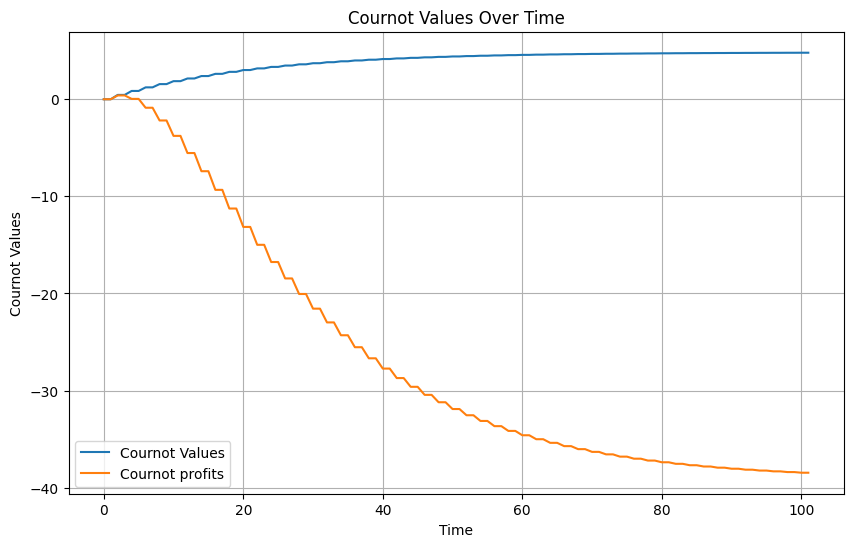

In [289]:
pastCournotValues = [0, 0]
profitsCournot = [0, 0]
const = ((1 +2*c)*d)/(4*(1+c)**2)
discount = (1/(1+c)**2)
print(const)
for i in range(0, 100):
    pastCournotValues.append((const + (pastCournotValues[i] * discount)))
    profitsCournot.append(profit(pastCournotValues[i+2], pastCournotValues[i+2]))

print(pastCournotValues)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastCournotValues)), pastCournotValues, label='Cournot Values')
plt.plot(range(len(profitsCournot)), profitsCournot, label='Cournot profits')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()


[0, 0.8571428571428571, 0.4489795918367347, 0.6433430515063168, 0.5507890230922301, 0.5948623699560809, 0.5738750619256757, 0.5838690181306306, 0.5791099913663664, 0.5813761945874446, 0.5802970501964549, 0.5808109284778785, 0.5805662245343436, 0.5806827502217412, 0.5806272617991708, 0.5806536848575378, 0.5806411024487915, 0.5806470940720041, 0.5806442409180933, 0.5806455995628128, 0.5806449525891367, 0.5806452606718397, 0.5806451139657905, 0.5806451838258141, 0.5806451505591362, 0.5806451664004114, 0.5806451588569469, 0.5806451624490728, 0.5806451607385368, 0.5806451615530778, 0.580645161165201, 0.5806451613499043, 0.5806451612619503, 0.5806451613038331, 0.5806451612838889, 0.5806451612933863, 0.5806451612888637, 0.5806451612910173, 0.5806451612899918, 0.58064516129048, 0.5806451612902477, 0.5806451612903583, 0.5806451612903056, 0.5806451612903306, 0.5806451612903187, 0.5806451612903244, 0.5806451612903216, 0.5806451612903231, 0.5806451612903223, 0.5806451612903227, 0.5806451612903225,

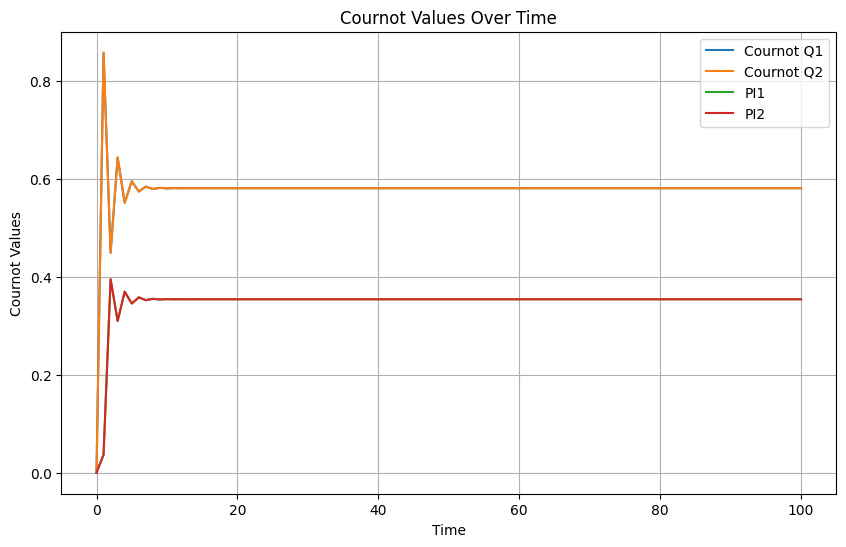

In [290]:
pastInteractiveCournotValues1 = [0]
pastInteractiveCournotValues2 = [0]
profitsInteractiveCournot1 = [0]
profitsInteractiveCournot2 = [0]
for i in range(0, 100):
    pastInteractiveCournotValues1.append((d-pastInteractiveCournotValues2[i]) / (2 *(1+c)))
    pastInteractiveCournotValues2.append((d-pastInteractiveCournotValues1[i]) / (2 *(1+c)))
    profitsInteractiveCournot1.append(profit(pastInteractiveCournotValues1[i+1], pastInteractiveCournotValues2[i+1]))
    profitsInteractiveCournot2.append(profit(pastInteractiveCournotValues2[i+1], pastInteractiveCournotValues1[i+1]))

print(pastInteractiveCournotValues1)
print(profitsInteractiveCournot1)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastInteractiveCournotValues1)), pastInteractiveCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastInteractiveCournotValues2)), pastInteractiveCournotValues2, label='Cournot Q2')
plt.plot(range(len(profitsInteractiveCournot1)), profitsInteractiveCournot1, label='PI1')
plt.plot(range(len(profitsInteractiveCournot2)), profitsInteractiveCournot2, label='PI2')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()

[0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.8571428571428571, 0, 0.85714

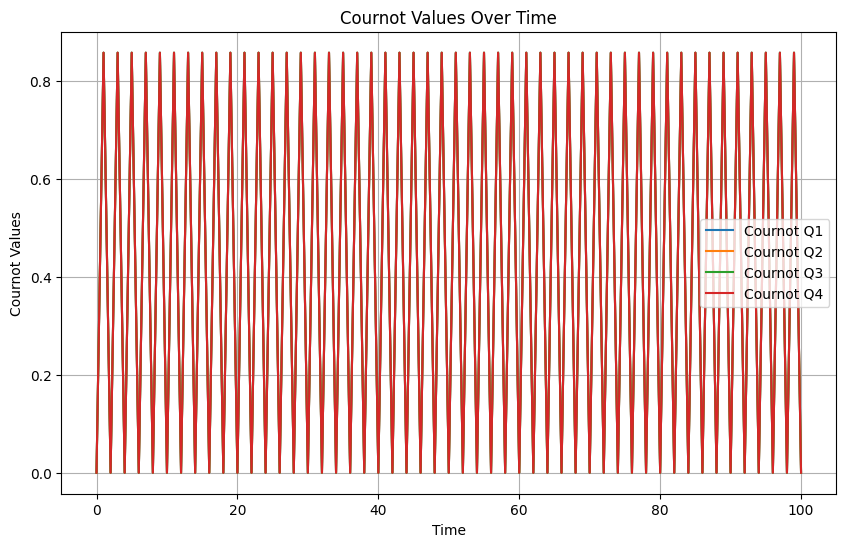

In [291]:
pastItCournotValues1 = [0]
pastItCournotValues2 = [0]
pastItCournotValues3 = [0]
pastItCournotValues4 = [0]
for i in range(0, 100):
    pastItCournotValues1.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues2.append(max((d-pastItCournotValues1[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues3.append(max((d-pastItCournotValues2[i] - pastItCournotValues1[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues4.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues1[i]) / (2 *(1+c)), 0))

print(pastItCournotValues1)
print(pastItCournotValues2)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastItCournotValues1)), pastItCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastItCournotValues2)), pastItCournotValues2, label='Cournot Q2')
plt.plot(range(len(pastItCournotValues3)), pastItCournotValues3, label='Cournot Q3')
plt.plot(range(len(pastItCournotValues4)), pastItCournotValues4, label='Cournot Q4')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()

In [292]:
# In a 4 oligopoly

q_comp4 = (c * d) / (2 + c)
q_cournot4 = d / (5 + 2 * c)

Q_comp4 = 4 * q_comp4
p_comp4 = price(q_comp4*2, q_comp4*2)
profit_comp4 = profit(q_comp4, 3*q_comp4)

print("Comp : ", q_comp4, Q_comp4, p_comp4, profit_comp4, profit_comp4*4)

Q_cournot4 = 4 * q_cournot4
p_cournot4 = price(q_cournot4*2, q_cournot4*2)
profit_cournot4 = profit(q_cournot4, 3*q_cournot4)
print("Cournot : ", q_cournot4, Q_cournot4, p_cournot4, profit_cournot4, profit_cournot4*4)

q_cartel4 = d / (2 * (4+c))
p_cartel4 = price(q_cartel4, q_cartel4*3)
profit_cartel4 = profit(q_cartel4, 3*q_cartel4)
print("Cartel : ", q_cartel4, 4*q_cartel4, p_cartel4, profit_cartel4, profit_cartel4*4)




Comp :  0.043902439024390255 0.17560975609756102 1.624390243902439 0.07121832242712672 0.2848732897085069
Cournot :  0.35294117647058826 1.411764705882353 0.3882352941176471 0.13079584775086503 0.5231833910034601
Cartel :  0.22222222222222224 0.888888888888889 0.911111111111111 0.19999999999999998 0.7999999999999999


In [293]:
profit(0.3795657, 1.746137-0.3795657)+ profit(0.4869857, 1.746137-0.4869857)+profit(0.401197, 1.746137-0.401197)+profit(0.4783882, 1.746137-0.4783882)

0.05550018091933907

In [294]:
k = 2
b = 0
def computeCournotStackelbergQuantities(D, C):
    qCt = (D*(1+2*C))/(4*(C**2)+8*C+3)
    qLr = D * (1+2*C)/ (2 * (1 + 4*C + C**2))
    qFr = (D - qLr) / (2 * (1+C))
    return qCt, qLr, qFr

def locprofit(qSelf, qOther, D, C):
    return k * ( (D - qSelf - qOther)*qSelf - C * qSelf**2) + b

profits_diff = {}
for C in range(0, 300):
    for D in range(0, 900):
       q1 = computeCournotStackelbergQuantities(D/100, C/100)[0]
       q2 = computeCournotStackelbergQuantities(D/100, C/100)[1]
       q3 = computeCournotStackelbergQuantities(D/100, C/100)[2]
       p1 = locprofit(q1, q1, D/100, C/100)
       p2 = locprofit(q2, q3, D/100, C/100)
       p3 = locprofit(q3, q2, D/100, C/100)
       p4 = locprofit(q1, q2, D/100, C/100)
       if C < D and p1 > 0 and p1 <1 and p2 > 0 and p2 < 1 and q1 < 0.9 and q2<0.9 and q3 > 0.1 and q3 < 0.9 and q1 >0.1 and q2 >0.1:
            profits_diff[(D, C)] = p2-p1 + 1*(p3-p4)

#print(profits_diff)
maxdiff = max(profits_diff, key = lambda k: profits_diff[k])

print ("Max Diff: ", [x/100 for x in maxdiff], "Raw: ", profits_diff[maxdiff])


Max Diff:  [1.79, 0.0] Raw:  0.13350416666666665
